<a href="https://colab.research.google.com/github/maulik-vyas/Tensors-Fundamentals/blob/main/CNN%20Binary%20Image%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-01-03 16:36:19--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 142.250.145.128, 2a00:1450:4013:c05::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  31.0MB/s    in 3.4s    

2023-01-03 16:36:22 (31.0 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
!ls pizza_steak/

test  train


In [3]:
!ls pizza_steak/train

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza


In [6]:
!ls -la pizza_steak/

total 16
drwxr-xr-x 4 root root 4096 Jan  3 16:36 .
drwxr-xr-x 1 root root 4096 Jan  3 16:36 ..
drwxr-xr-x 4 root root 4096 Jan  3 16:36 test
drwxr-xr-x 4 root root 4096 Jan  3 16:36 train


In [7]:
num_image = len(os.listdir("pizza_steak/train/pizza"))
num_image

750

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")
  return img

Image shape: (384, 512, 3)


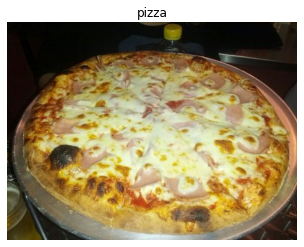

In [9]:
img = view_random_image(target_dir="pizza_steak/train/",
                   target_class="pizza")

In [10]:
import tensorflow as tf

tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 8,  8,  8],
        [ 9,  9,  9],
        [11, 11, 11],
        ...,
        [30, 24, 10],
        [27, 21,  7],
        [25, 19,  5]],

       [[ 6,  6,  6],
        [ 7,  7,  7],
        [ 8,  8,  8],
        ...,
        [32, 26, 12],
        [30, 24, 10],
        [30, 24, 10]],

       [[ 5,  5,  5],
        [ 6,  6,  6],
        [ 7,  7,  7],
        ...,
        [30, 24, 10],
        [30, 24, 10],
        [33, 27, 13]],

       ...,

       [[50, 41, 10],
        [51, 42, 11],
        [55, 46, 13],
        ...,
        [23, 14,  9],
        [23, 14,  9],
        [25, 16, 11]],

       [[46, 37,  6],
        [48, 39,  8],
        [52, 43, 10],
        ...,
        [23, 16, 10],
        [23, 14,  9],
        [24, 15, 10]],

       [[47, 38,  7],
        [48, 39,  6],
        [53, 44, 11],
        ...,
        [24, 17, 11],
        [23, 14,  9],
        [21, 12,  7]]], dtype=uint8)>

End-to-end model

In [11]:
import tensorflow as tf

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model1.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics="accuracy")

history1 = model1.fit(train_data, 
                      epochs=5, 
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 19s 215ms/step - loss: 0.5684 - accuracy: 0.6940 - val_loss: 0.4423 - val_accuracy: 0.7720
Epoch 2/5
47/47 [==============================] - 10s 224ms/step - loss: 0.4203 - accuracy: 0.8080 - val_loss: 0.3325 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 10s 205ms/step - loss: 0.3925 - accuracy: 0.8240 - val_loss: 0.3824 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 10s 203ms/step - loss: 0.3635 - accuracy: 0.8440 - val_loss: 0.3023 - val_accuracy: 0.8640
Epoch 5/5
47/47 [==============================] - 9s 200ms/step - loss: 0.3161 - accuracy: 0.8740 - val_loss: 0.2865 - val_accuracy: 0.8760


In [13]:
# Epoch 1/5
# 47/47 [==============================] - 109s 2s/step - loss: 0.9274 - accuracy: 0.5573 - val_loss: 0.9404 - val_accuracy: 0.5000

Using the same model which I had built on circle dataset to see how it performs on this dataset

In [14]:
len(train_data)

47

In [15]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model2.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

history2 = model2.fit(train_data, 
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 195ms/step - loss: 1.0827 - accuracy: 0.4973 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 188ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 187ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 190ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 186ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


Model 3 to beat model 2 accuracy

In [16]:
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(80, activation="relu"),
    tf.keras.layers.Dense(80, activation="relu"),
    tf.keras.layers.Dense(80, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model3.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=["accuracy"])

model3.fit(train_data,
           epochs=5,
           steps_per_epoch=len(train_data),
           validation_data=valid_data,
           validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 193ms/step - loss: 38.5646 - accuracy: 0.6013 - val_loss: 1.9047 - val_accuracy: 0.6880
Epoch 2/5
47/47 [==============================] - 9s 188ms/step - loss: 1.2597 - accuracy: 0.6780 - val_loss: 0.7173 - val_accuracy: 0.5680
Epoch 3/5
47/47 [==============================] - 9s 189ms/step - loss: 0.5605 - accuracy: 0.7347 - val_loss: 0.5045 - val_accuracy: 0.7620
Epoch 4/5
47/47 [==============================] - 9s 188ms/step - loss: 0.5032 - accuracy: 0.7620 - val_loss: 0.4737 - val_accuracy: 0.7800
Epoch 5/5
47/47 [==============================] - 9s 188ms/step - loss: 0.5017 - accuracy: 0.7820 - val_loss: 0.5609 - val_accuracy: 0.7040


In [17]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 80)                12042320  
                                                                 
 dense_5 (Dense)             (None, 80)                6480      
                                                                 
 dense_6 (Dense)             (None, 80)                6480      
                                                                 
 dense_7 (Dense)             (None, 1)                 81        
                                                                 
Total params: 12,055,361
Trainable params: 12,055,361
Non-trainable params: 0
_________________________________________________________________


Model 4 - Just a simple baseline model

In [18]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [19]:
tf.random.set_seed(42)

model4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history4 = model4.fit(train_data, 
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 222ms/step - loss: 0.8250 - accuracy: 0.6653 - val_loss: 0.4889 - val_accuracy: 0.7620
Epoch 2/5
47/47 [==============================] - 9s 201ms/step - loss: 0.5239 - accuracy: 0.7540 - val_loss: 0.3766 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 10s 204ms/step - loss: 0.3866 - accuracy: 0.8360 - val_loss: 0.3853 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 9s 200ms/step - loss: 0.2935 - accuracy: 0.8900 - val_loss: 0.3610 - val_accuracy: 0.8360
Epoch 5/5
47/47 [==============================] - 9s 199ms/step - loss: 0.2213 - accuracy: 0.9227 - val_loss: 0.3853 - val_accuracy: 0.8480


In [20]:
model1.evaluate(valid_data)

16/16 [==============================] - 2s 140ms/step - loss: 0.2865 - accuracy: 0.8760


[0.28651657700538635, 0.8759999871253967]

In [21]:
model4.evaluate(valid_data)

16/16 [==============================] - 2s 143ms/step - loss: 0.3853 - accuracy: 0.8480


[0.3853241801261902, 0.8479999899864197]

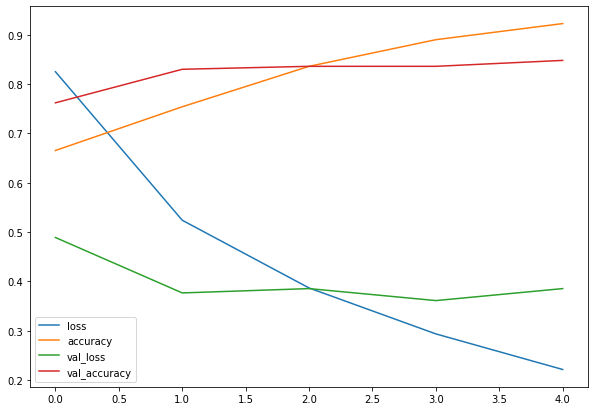

In [22]:
import pandas as pd

pd.DataFrame(history4.history).plot(figsize=(10, 7))

Model 5

In [23]:
tf.random.set_seed(42)

model5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [24]:
model5.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics=["accuracy"])

history5 = model5.fit(train_data,
           epochs=5,
           steps_per_epoch=len(train_data),
           validation_data=valid_data,
           validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 204ms/step - loss: 0.6396 - accuracy: 0.6167 - val_loss: 0.5002 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 9s 195ms/step - loss: 0.4662 - accuracy: 0.7860 - val_loss: 0.3712 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 9s 201ms/step - loss: 0.4203 - accuracy: 0.8120 - val_loss: 0.3585 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 9s 195ms/step - loss: 0.4024 - accuracy: 0.8287 - val_loss: 0.3401 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 9s 195ms/step - loss: 0.3751 - accuracy: 0.8387 - val_loss: 0.3296 - val_accuracy: 0.8540


In [25]:
model5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

In [26]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [27]:
477341/8861

53.86987924613475

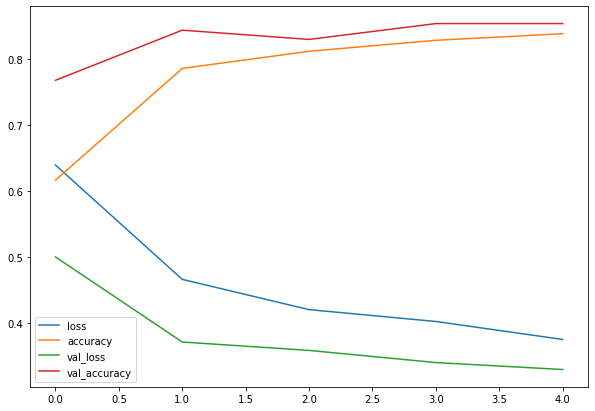

In [28]:
import pandas as pd

pd.DataFrame(history5.history).plot(figsize=(10, 7))

Data Augmentation

In [29]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255., 
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

In [30]:
from tensorflow.python.ops.batch_ops import batch
print("augmented training data")

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False)
print("non-augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

print("non-augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary")

augmented training data
Found 1500 images belonging to 2 classes.
non-augmented training data
Found 1500 images belonging to 2 classes.
non-augmented test data
Found 500 images belonging to 2 classes.


In [31]:
# Let's visualize the augmented images
# Get sample data batches

images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

showing image nummber: 29


(-0.5, 223.5, 223.5, -0.5)

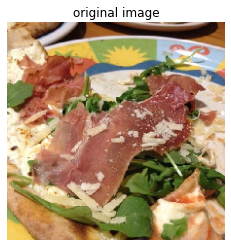

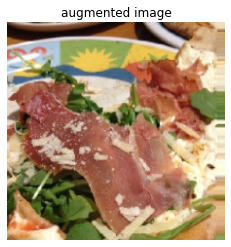

In [32]:
# Show original and augmented image

import random
random_number = random.randint(0, 32)
print(f"showing image nummber: {random_number}")
plt.imshow(images[random_number])
plt.title("original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("augmented image")
plt.axis(False)

In [33]:
tf.random.set_seed(42)

model6 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [34]:
model6.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics="accuracy")

history6 = model6.fit(train_data_augmented, 
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 483ms/step - loss: 0.7066 - accuracy: 0.4573 - val_loss: 0.6888 - val_accuracy: 0.6120
Epoch 2/5
47/47 [==============================] - 22s 476ms/step - loss: 0.6932 - accuracy: 0.4993 - val_loss: 0.6779 - val_accuracy: 0.6220
Epoch 3/5
47/47 [==============================] - 22s 474ms/step - loss: 0.7036 - accuracy: 0.5567 - val_loss: 0.6690 - val_accuracy: 0.5180
Epoch 4/5
47/47 [==============================] - 22s 471ms/step - loss: 0.6796 - accuracy: 0.5993 - val_loss: 0.6290 - val_accuracy: 0.6540
Epoch 5/5
47/47 [==============================] - 22s 475ms/step - loss: 0.6479 - accuracy: 0.6280 - val_loss: 0.5163 - val_accuracy: 0.8200


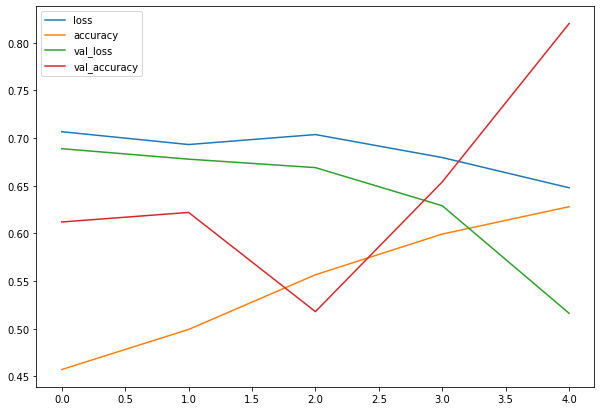

In [35]:
pd.DataFrame(history6.history).plot(figsize=(10, 7))

Model 7 with shuffled data

In [36]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            class_mode="binary",
                                                                            shuffle=True)

Found 1500 images belonging to 2 classes.


In [37]:
# Create the model same as Model 5 and Model 6

tf.random.set_seed(42)

model7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [38]:
model7.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics="accuracy")

In [39]:
history7 = model7.fit(train_data_augmented_shuffled,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented_shuffled),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 24s 504ms/step - loss: 0.6377 - accuracy: 0.6347 - val_loss: 0.5080 - val_accuracy: 0.7700
Epoch 2/5
47/47 [==============================] - 22s 475ms/step - loss: 0.5432 - accuracy: 0.7200 - val_loss: 0.4152 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 23s 481ms/step - loss: 0.5019 - accuracy: 0.7447 - val_loss: 0.3630 - val_accuracy: 0.8460
Epoch 4/5
47/47 [==============================] - 22s 475ms/step - loss: 0.4924 - accuracy: 0.7727 - val_loss: 0.3592 - val_accuracy: 0.8680
Epoch 5/5
47/47 [==============================] - 22s 477ms/step - loss: 0.4555 - accuracy: 0.7840 - val_loss: 0.3465 - val_accuracy: 0.8560


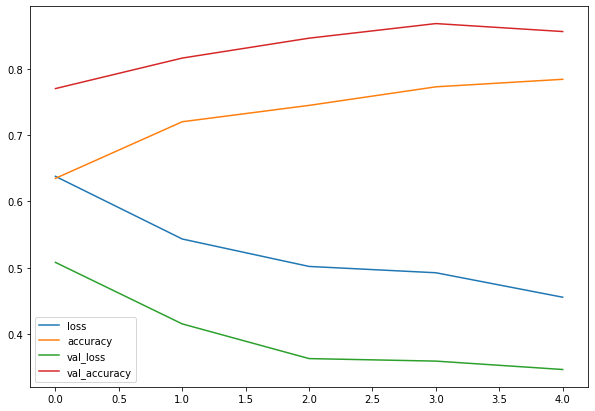

In [40]:
pd.DataFrame(history7.history).plot(figsize=(10, 7))